# Twitter Analysis (2020&ndash;2021)

## Datasets

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

### BTSArmy, Khashoggi, MeToo, QAnon

- Four separate datasets about Twitter Tweets with hashtag #BTSArmy, #Khashoggi, #MeToo, and #QAnon respectively containing data about User ID, Tweet ID, Tweet Time, and if the account is suspended or not

In [2]:
twitter_files = ['./Twitter_Data/BTSArmy.csv.txt', './Twitter_Data/Khashoggi.csv.txt', './Twitter_Data/MeToo.csv.txt', './Twitter_Data/QAnon.csv.txt']

## Sorting the Data

### Grouping the data by user

In [3]:
for file in twitter_files:
    twitter_data = pd.read_csv(file)

    # Group by total_tweets and aggregate the total no. of users and suspended accounts
    group_by_user = twitter_data.groupby('user_id').agg({'tweet_id': 'count', 'suspended': 'max'}).reset_index()
    group_by_user.columns = ['user_id', 'total_tweets', 'suspended']

    # Sort the data by total_tweets in ascending order
    group_by_user = group_by_user.sort_values(by='total_tweets', ascending=True)

    # Save to <Hastag>__Tweet_By_User.csv.txt
    output_file = file.replace('.csv.txt', '_Tweet_By_User.csv.txt')
    group_by_user.to_csv(output_file, index=False)

- New csv files containing data grouped by user

In [4]:
twitter_files_by_user = ['./Twitter_Data/BTSArmy_Tweet_By_User.csv.txt', './Twitter_Data/Khashoggi_Tweet_By_User.csv.txt', './Twitter_Data/MeToo_Tweet_By_User.csv.txt', './Twitter_Data/QAnon_Tweet_By_User.csv.txt']

### Grouping the new data by Total Tweets made by each user

#### Observation

As observed from the grouped data, the datasets lack sufficient data, particularly for BTSArmy and Khashoggi. Only 3570 and 1313 users tweeted once for each hashtag, respectively, with a sharp decline to low single-digit users. I have created an inclusion criterion for the graph, requiring at least three users for a particular tweet count to be included.

In [5]:
for file in twitter_files_by_user:
    twitter_data = pd.read_csv(file)

    # Group by total_tweets and aggregate the total no. of users and suspended accounts
    grouped_tweet_count = twitter_data.groupby('total_tweets').agg({'user_id': 'count', 'suspended': 'sum'}).reset_index()
    grouped_tweet_count.columns = ['tweet_count', 'total_users', 'total_suspended']

    # Fraction of suspended accounts
    grouped_tweet_count['fraction_suspended'] = grouped_tweet_count['total_suspended'] / grouped_tweet_count['total_users']

    # Save to <Hastag>__Tweet_By_Count.csv.txt
    output_file = file.replace('_Tweet_By_User.csv.txt', '_Tweet_By_Count.csv.txt')
    grouped_tweet_count.to_csv(output_file, index=False)

    #print(grouped_tweet_count)

- New csv files containing data grouped by tweet count of users

In [6]:
twitter_files_by_count = ['./Twitter_Data/BTSArmy_Tweet_By_Count.csv.txt', './Twitter_Data/Khashoggi_Tweet_By_Count.csv.txt', './Twitter_Data/MeToo_Tweet_By_Count.csv.txt', './Twitter_Data/QAnon_Tweet_By_Count.csv.txt']

## Graphical Resprentations

### Fraction Suspended

Bar graphs for the four hashtag datasets, with the x-axis being the number of times an account tweeted about a given hashtag (e.g., #QAnon) and the proportion of those users that were suspended on the y-axis.

#### Inclusion Criteria

1. More than 3 users tweeted for a Tweet Count

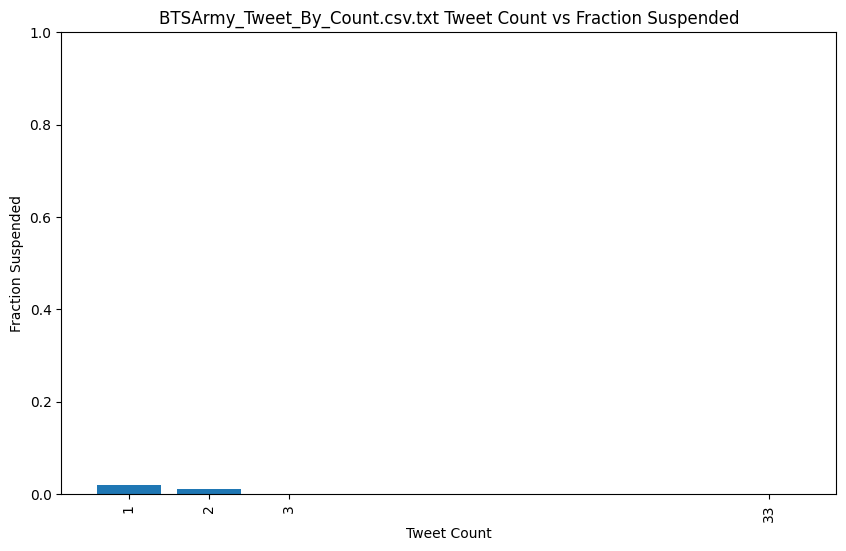

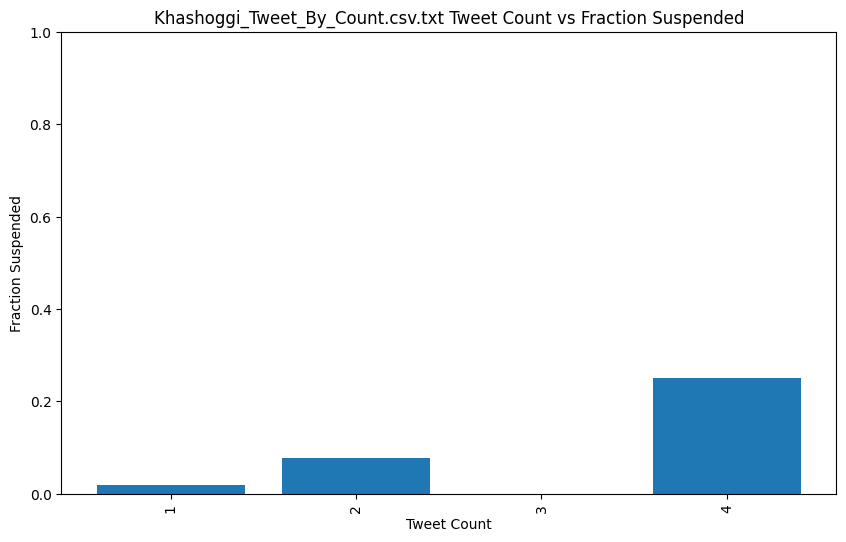

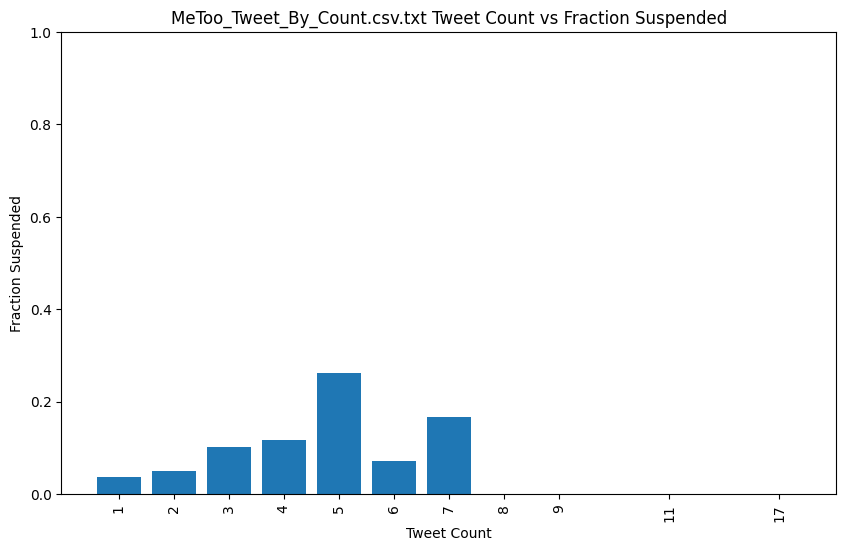

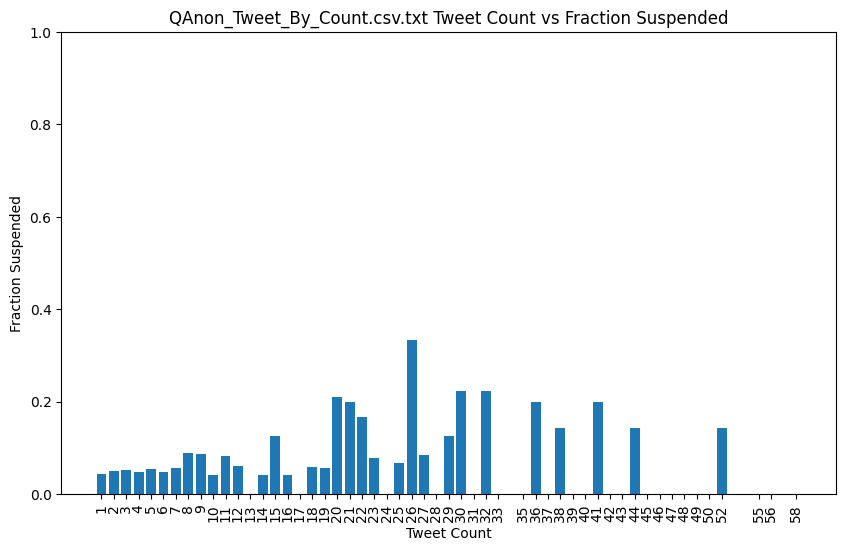

In [7]:
for file in twitter_files_by_count:
    # Read the new file
    twitter_data = pd.read_csv(file)
    twitter_data = twitter_data[twitter_data['total_users'] >= 3] # inclusion criteria
    plt.figure(figsize=(10, 6))

    # plot the bar
    plt.bar(twitter_data.index, twitter_data['fraction_suspended'])

    # x-axis with ticks
    plt.xticks(twitter_data.index, twitter_data['tweet_count'], rotation=90)
    plt.ylim(0, 1)
    plt.xlabel('Tweet Count')
    plt.ylabel('Fraction Suspended')
    plt.title(f'{file.split("Data/")[1]} Tweet Count vs Fraction Suspended')
    plt.show()

# EU Data Analysis (2003&ndash;2016)

In [8]:
import csv
import pandas as pd
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

## Datasets

### EU Commission Dataset by Cheruvu

- One Large Dataset containing data about actions taken by EU Commission against EU Member States, including variables indicating government ideology, public sentiment, and election data.

In [9]:
cheruvu_data = pd.read_csv('./EU_Data/eucommission.csv')

### Infringement Cases Dataset taken from Official EU Website

- One Large Dataset containing data about all actions taken by EU Commission against EU Member States in detail.

In [31]:
eu_data = pd.read_excel('./EU_Data/official_eu_data.xlsx')
lfn_data = pd.read_excel('./EU_Data/LFN_data.xlsx')
ro_data = pd.read_excel('./EU_Data/RO_data.xlsx')
rf_data = pd.read_excel('./EU_Data/RF_data.xlsx')

### ParlGov Dataset

- One Large Dataset containing detailed information about Political Parties and Elections, including party ideologies and election seats won

In [11]:
parlgov_data = pd.read_excel('./EU_Data/parlgov.xlsx')

## Anaylsis and Graphical Resprentations

### EU Countries

- Helpful to filter important parts when dealing large data

In [12]:
# All EU countries
all_countries = ['Denmark', 'Poland', 'Belgium', 'United Kingdom', 'Czech Republic', 'Latvia',
             'Austria', 'Romania', 'Cyprus', 'Slovenia', 'Estonia', 'Luxembourg', 'Italy',
             'Hungary', 'Greece', 'Netherlands', 'Bulgaria', 'Finland', 'Ireland', 'Spain',
             'Lithuania', 'Portugal', 'Slovakia', 'France', 'Malta', 'Croatia', 'Germany',
             'Sweden']

# Chevuru Countries
chevuru_countries = cheruvu_data['member_state'].unique()

# Top 5 Populated Countries
top_5_popl_countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain']

### Derive Columns from ParlGov dataset

Based on the ParlGov data above, specifically variable **eu_anti_pro**,  we derive a series of new variable sum_weighted_eu_anti_pro which is the sum of weighted averages of eu_anti_pro each party based on the seats it won in the election. 

In [13]:
# Read the party sheet from ParlGov 
party_data = pd.read_excel('./EU_Data/parlgov.xlsx', sheet_name='party')

# Read the election sheet from ParlGov 
election_data = pd.read_excel('./EU_Data/parlgov.xlsx', sheet_name='election')

# Merge the two dataframes based on the party ID
election_party_data = election_data.merge(party_data[['party_id', 'eu_anti_pro']], on='party_id', how='left')

# Fill missing values in the 'eu_anti_pro' and 'seat' column with 0
election_party_data['eu_anti_pro'].fillna(0, inplace=True)
election_party_data['seats'].fillna(0, inplace=True)

# Calculate the mean value of 'eu_anti_pro' weighted by seats
election_party_data['weighted_eu_anti_pro'] = (election_party_data.eu_anti_pro * election_party_data.seats) / election_party_data.seats_total

# Filter out data from year 2003 to 2021 and only from EU Countries
filtered_merged_data = election_party_data[(election_party_data['election_date'] >= '2003-01-01') & (election_party_data['election_date'] <= '2021-12-31')]
filtered_merged_data = filtered_merged_data[filtered_merged_data['country_name'].isin(all_countries)]

# Group rows by election_id, country_name, and election_date, and calculate the sum of mean_eu_anti_pro
weighted_sum_data = filtered_merged_data.groupby(['election_id', 'country_name', 'election_date']).weighted_eu_anti_pro.sum().reset_index()

# Rename the column
weighted_sum_data.rename(columns={'weighted_eu_anti_pro': 'sum_weighted_eu_anti_pro'}, inplace=True)

print("Data Stored in ./EU_Data/Weighted_ParlGov.csv")
weighted_sum_data.to_csv('./EU_Data/Weighted_ParlGov.csv', index=False)

Data Stored in ./EU_Data/Weighted_ParlGov.csv


### Derived Data File

In [14]:
weighted_parlgov_data = pd.read_csv('./EU_Data/Weighted_ParlGov.csv')

- Total Unique (Non-Zero) Values of Weighted EU Ideology

In [15]:
# Filter out non-zero values
non_zero_weighted_parlgov_data = weighted_parlgov_data[weighted_parlgov_data['sum_weighted_eu_anti_pro'] != 0]

# Calculate the total number of unique non-zero sum_mean_eu_anti_pro values
unique_eu_values = non_zero_weighted_parlgov_data['sum_weighted_eu_anti_pro'].nunique()

print("Total unique values of sum_weighted_eu_anti_pro:", unique_eu_values)

Total unique values of sum_weighted_eu_anti_pro: 230


### Parliament Ideology (sum_weighted_eu_anti_pro) over Time

/tmp/ipykernel_28964/2074178549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_sum_5_country_data['election_date'] = pd.to_datetime(weighted_sum_5_country_data['election_date'])
/tmp/ipykernel_28964/2074178549.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_sum_5_country_data.sort_values(by='election_date', inplace=True)


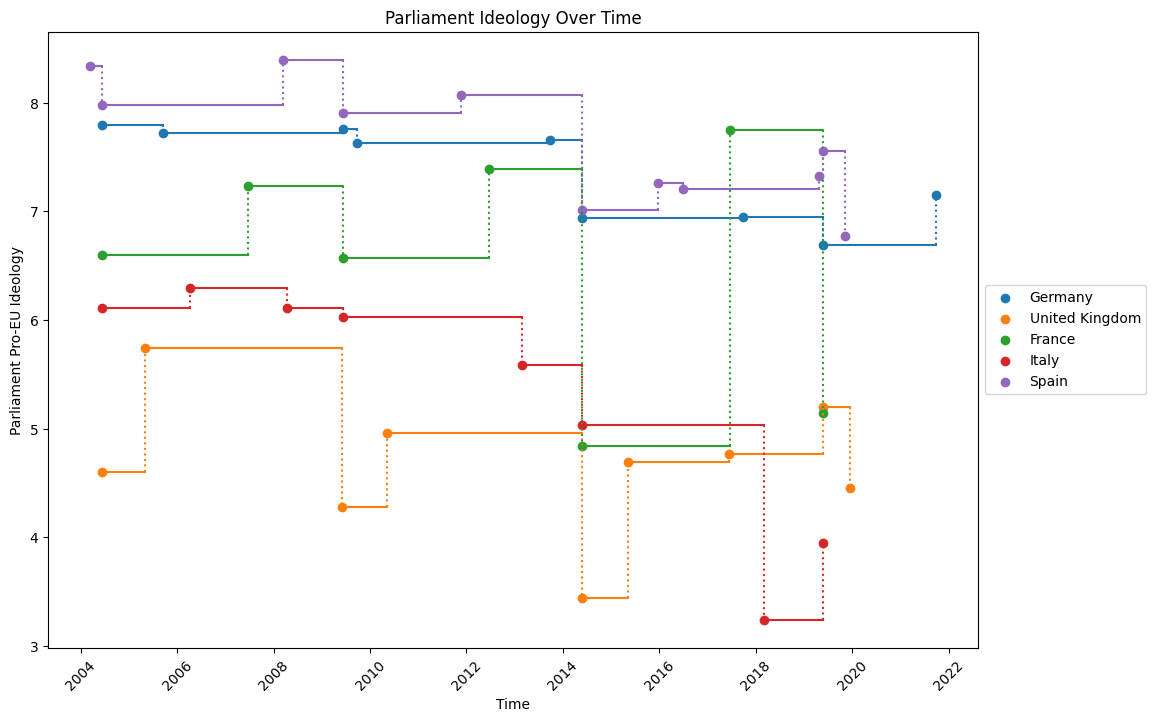

In [16]:
# Table stored in weighted_sum_data

# Filter the data for the specified countries
weighted_sum_5_country_data = weighted_sum_data[weighted_sum_data['country_name'].isin(top_5_popl_countries)]

# Convert 'election_date' column to datetime format
weighted_sum_5_country_data['election_date'] = pd.to_datetime(weighted_sum_5_country_data['election_date'])

# Sort the filtered data by election_date
weighted_sum_5_country_data.sort_values(by='election_date', inplace=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot sum_weighted_eu_anti_pro vs election_date for each country with bold markers and connect the points
for country in top_5_popl_countries:
    country_data = weighted_sum_5_country_data[weighted_sum_5_country_data['country_name'] == country]
    color = plt.rcParams['axes.prop_cycle'].by_key()['color'][top_5_popl_countries.index(country)]
    
    plt.scatter(country_data['election_date'], country_data['sum_weighted_eu_anti_pro'], label=country, marker='o', linewidths=1, color=color)
    
    # The Parliament Ideology remains the same until another election
    for i in range(len(country_data) - 1):
        # Draw a horizontal line till the next point
        plt.plot([country_data.iloc[i]['election_date'], country_data.iloc[i + 1]['election_date']],
                 [country_data.iloc[i]['sum_weighted_eu_anti_pro'], country_data.iloc[i]['sum_weighted_eu_anti_pro']], color=color)
        
        # dotted line to signify the sudden jump to the next point
        plt.plot([country_data.iloc[i + 1]['election_date'], country_data.iloc[i + 1]['election_date']],
                 [country_data.iloc[i]['sum_weighted_eu_anti_pro'], country_data.iloc[i + 1]['sum_weighted_eu_anti_pro']],
                 color=color, linestyle='dotted')

# Set the x-axis and y-axis labels
plt.xlabel('Time')
plt.ylabel('Parliament Pro-EU Ideology')

# Set the title of the plot
plt.title('Parliament Ideology Over Time')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


### Cheruvu Data Analysis

#### Non-Communication & Non-Conformity Proceedings

- The paper states that “Launching a noncommunication proceeding is more or less automatic by the Commission, and most member states quickly comply following an LFN. The Commission will launch noncommunication proceed ings against multiple member states together if they fail to transpose a directive on time.”

- Below, the total no. of Non-Communcation proceedings where RO stage was reached vs where it was not is calculated. Over 11000 proceedings out of the total proceedings were Non-Communcation and about 80% did not reach an RO stage.

In [17]:
# Non-Communication Proceeding
ro_stage_not_reached = len(cheruvu_data[(cheruvu_data['incorrect'] == 0) & (cheruvu_data['RO_258'] == 0)])
ro_stage_reached = len(cheruvu_data[(cheruvu_data['incorrect'] == 0) & (cheruvu_data['RO_258'] == 1)])
total_non_communication_proceedings = ro_stage_reached + ro_stage_not_reached

rf_stage_not_reached = len(cheruvu_data[(cheruvu_data['incorrect'] == 0) & (cheruvu_data['RF_258'] == 0) & (cheruvu_data['RO_258'] == 1)])
rf_stage_reached = len(cheruvu_data[(cheruvu_data['incorrect'] == 0) & (cheruvu_data['RF_258'] == 1)])

print("Total Non-Communication proceedings where it alteast reached the RO stage:", ro_stage_reached, f"({(ro_stage_reached / total_non_communication_proceedings) * 100:.2f}% of total Non-Communcation Proceedings)")
print("Total Non-Communication proceedings where it did not reach the RO stage:", ro_stage_not_reached, f"({(ro_stage_not_reached / total_non_communication_proceedings) * 100:.2f}% of total Non-Communcation Proceedings)")

print()

print("Total Non-Communication proceedings where it reached the RF stage:", rf_stage_reached, f"({(rf_stage_reached / total_non_communication_proceedings) * 100:.2f}% of total Non-Communcation Proceedings)")
print("----")

# Non-Conformity Proceeding
ro_stage_not_reached_nc = len(cheruvu_data[(cheruvu_data['incorrect'] == 1) & (cheruvu_data['RO_258'] == 0)])
ro_stage_reached_nc = len(cheruvu_data[(cheruvu_data['incorrect'] == 1) & (cheruvu_data['RO_258'] == 1)])
total_non_conformity_proceedings_nc = ro_stage_reached_nc + ro_stage_not_reached_nc

rf_stage_not_reached_nc = len(cheruvu_data[(cheruvu_data['incorrect'] == 1) & (cheruvu_data['RF_258'] == 0) & (cheruvu_data['RO_258'] == 1)])
rf_stage_reached_nc = len(cheruvu_data[(cheruvu_data['incorrect'] == 1) & (cheruvu_data['RF_258'] == 1)])

print("Total Non-Conformity proceedings where it alteast reached the RO stage:", ro_stage_reached_nc, f"({(ro_stage_reached_nc / total_non_conformity_proceedings_nc) * 100:.2f}% of total Non-Conformity Proceedings)")
print("Total Non-Conformity proceedings where it did not reach the RO stage:", ro_stage_not_reached_nc, f"({(ro_stage_not_reached_nc / total_non_conformity_proceedings_nc) * 100:.2f}% of total Non-Conformity Proceedings)")

print()

print("Total Non-Conformity proceedings where it reached the RF stage:", rf_stage_reached_nc, f"({(rf_stage_reached_nc / total_non_conformity_proceedings_nc) * 100:.2f}% of total Non-Conformity Proceedings)")


Total Non-Communication proceedings where it alteast reached the RO stage: 2555 (23.44% of total Non-Communcation Proceedings)
Total Non-Communication proceedings where it did not reach the RO stage: 8343 (76.56% of total Non-Communcation Proceedings)

Total Non-Communication proceedings where it reached the RF stage: 491 (4.51% of total Non-Communcation Proceedings)
----
Total Non-Conformity proceedings where it alteast reached the RO stage: 1753 (39.53% of total Non-Conformity Proceedings)
Total Non-Conformity proceedings where it did not reach the RO stage: 2682 (60.47% of total Non-Conformity Proceedings)

Total Non-Conformity proceedings where it reached the RF stage: 525 (11.84% of total Non-Conformity Proceedings)


#### Total Counts of LFNs, ROs, RFs, Nonconformity, & Noncommunication proceedings
- LFN_258 &ndash; Binary variable, with value of 1 indicating the Commission issued a Letter of Formal Notice in the proceeding.
- Incorrect &ndash;  Binary variable which takes the value of 1 for a nonconformity proceeding and a value of 0 for a noncommunication proceeding
- RO_258 &ndash;  Binary variable, with value of 1 indicating the Commission issued a Reasoned Opinion in the proceeding
- RF_258 &ndash; Binary variable, with value of 1 indicating the Commission referred the
case to the CJEU

In [18]:
# Total number of LFNs
total_lfns = cheruvu_data['LFN_258'].sum()

# Total number of ROs
total_ros = cheruvu_data['RO_258'].sum()

# Total number of ROs
total_rf = cheruvu_data['RF_258'].sum()

# Elections that overlapped with LFN Date
total_lfn_election = cheruvu_data['LFN_election'].sum()

# Sum of incorrect = 1
sum_incorrect_1 = cheruvu_data['incorrect'].sum()

# Sum of incorrect = 0
sum_incorrect_0 = (cheruvu_data['incorrect'] == 0).sum()

print("Total Number of LFNs:", total_lfns)
print("Total Number of Nonconformity:", sum_incorrect_1)
print("Total Number of Non-Communication:", sum_incorrect_0)
print("Total Number of ROs:", total_ros)
print("Total Number of RFs:", total_rf)
print("Total Number of LFN_election:", total_lfn_election)

Total Number of LFNs: 15333
Total Number of Nonconformity: 4435
Total Number of Non-Communication: 10898
Total Number of ROs: 4308
Total Number of RFs: 1016
Total Number of LFN_election: 3145


#### Yearly Counts of LFNs, ROs, RFs, Nonconformity, & Noncommunication proceedings

In [19]:
# Group the data by year
sum_by_year = cheruvu_data.groupby('year').agg({
    'LFN_258': 'sum', 
    'RO_258': 'sum', 
    'RF_258': 'sum', 
    'incorrect': 'sum', 
    'LFN_election': 'sum'})

sum_by_year.columns = ['LFNs', 'ROs', 'RFs', 'Non-Conformity', 'LFNs overlapping with election']

print(sum_by_year)

      LFNs  ROs  RFs  Non-Conformity  LFNs overlapping with election
year                                                                
2003  1405  456  187             344                             215
2004  1846  515  143             347                             264
2005  1528  504  173             513                             305
2006  1447  527  150             606                             470
2007  1682  448  134             517                             362
2008  1276  415  114             500                             221
2009  1034  310   57             506                             253
2010  1138  280   21             292                             212
2011  1338  365    7             198                             315
2012   654  159   14             203                             131
2013   651  163   10             187                             131
2014   698  131    6             161                             153
2015   423   33    0              

#### Non-Compliance

- Non-Compliance of a country can be determined by the number of LFN, Non-Conformity and Non-Communcation, RO, and RFs. The code below plots a graph that maps the total no. of above cases for each country. The highest no. of LFNs recorded were for Italy, Greece, and Portugal.

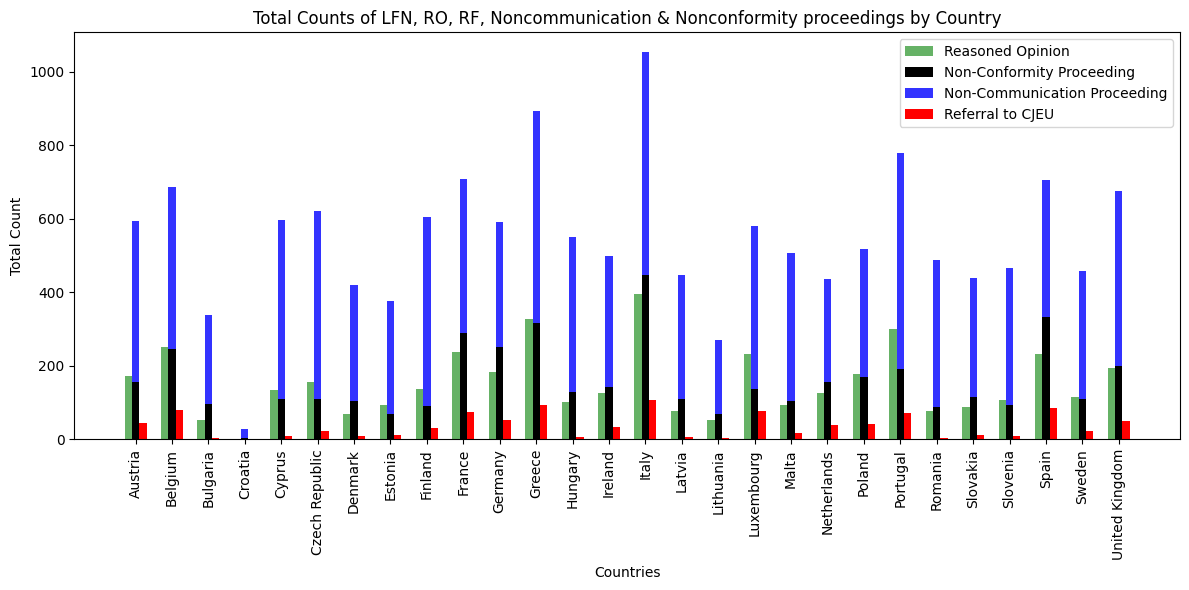

In [20]:
# Group by member_state
sum_by_member = cheruvu_data.groupby('member_state').agg({
    'LFN_258': 'sum',
    'RO_258': 'sum',
    'RF_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

noncomm_by_member = cheruvu_data.groupby('member_state').agg({
    'incorrect': lambda x: x.eq(0).sum()
}).reset_index()

plt.figure(figsize=(12, 6))

# Get the countries
total_countries = sum_by_member['member_state']

# Sum of LFN, RO, RF, Nonconformity & Non-Comm
lfn_by_country = sum_by_member['LFN_258']
ro_by_country = sum_by_member['RO_258']
rf_by_country = sum_by_member['RF_258']
incorrect_1_by_country = sum_by_member['incorrect']
incorrect_0_by_country = noncomm_by_member['incorrect']

country_bar_width = 0.2
x_positions = np.arange(len(total_countries))

# Plot the bars for each category
plt.bar(x_positions - country_bar_width, ro_by_country, width=country_bar_width, label='Reasoned Opinion', color='green', alpha=0.6)
plt.bar(x_positions, incorrect_1_by_country, width=country_bar_width, label='Non-Conformity Proceeding', color='black')
plt.bar(x_positions, incorrect_0_by_country, bottom=incorrect_1_by_country, width=country_bar_width, label='Non-Communication Proceeding', color='blue', alpha=0.8)
plt.bar(x_positions + country_bar_width, rf_by_country, width=country_bar_width, label='Referral to CJEU', color='red')


plt.xticks(x_positions, total_countries, rotation=90)

plt.xlabel('Countries')
plt.ylabel('Total Count')
plt.title('Total Counts of LFN, RO, RF, Noncommunication & Nonconformity proceedings by Country')
plt.legend()
plt.tight_layout()
plt.show()


#### Non-Compliance Data Over Time

- Plotting the number of LFNs, ROs, and RFs (3 different graphs) countries receives over time. To improve visualization, I implemented a rolling window approach. I used a fixed window size of 6 months and calculated the average LFNs within that window for every month.

##### Inclusion Criteria

- The combination of all countries in a graph resulted in a cluttered and visually confusing representation, so filtered graph for the top 5 populated countries.

##### Overall Trends:

- The number of Letters of Formal Notice (LFN_258 = 1) issued by the Commission peaked in 2004 and then generally decreased over time, with some fluctuations.

- The number of Reasoned Opinions (RO_258 = 1) and referrals to the CJEU (RF_258 = 1) also peaked in the mid-2000s and then decreased.

- The number of Nonconformity proceedings (incorrect = 1) peaked in 2006 and then decreased.

- The number of proceedings overlapping an election in the LFN stage (LFN_election = 1) peaked in 2006 and then generally decreased, with some fluctuations

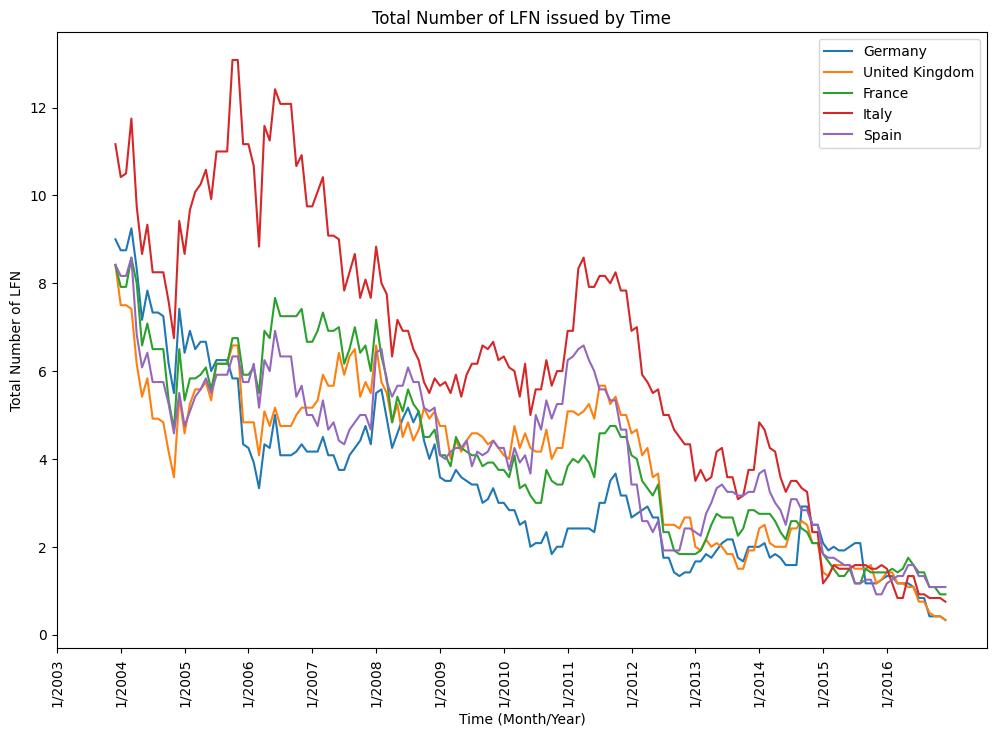

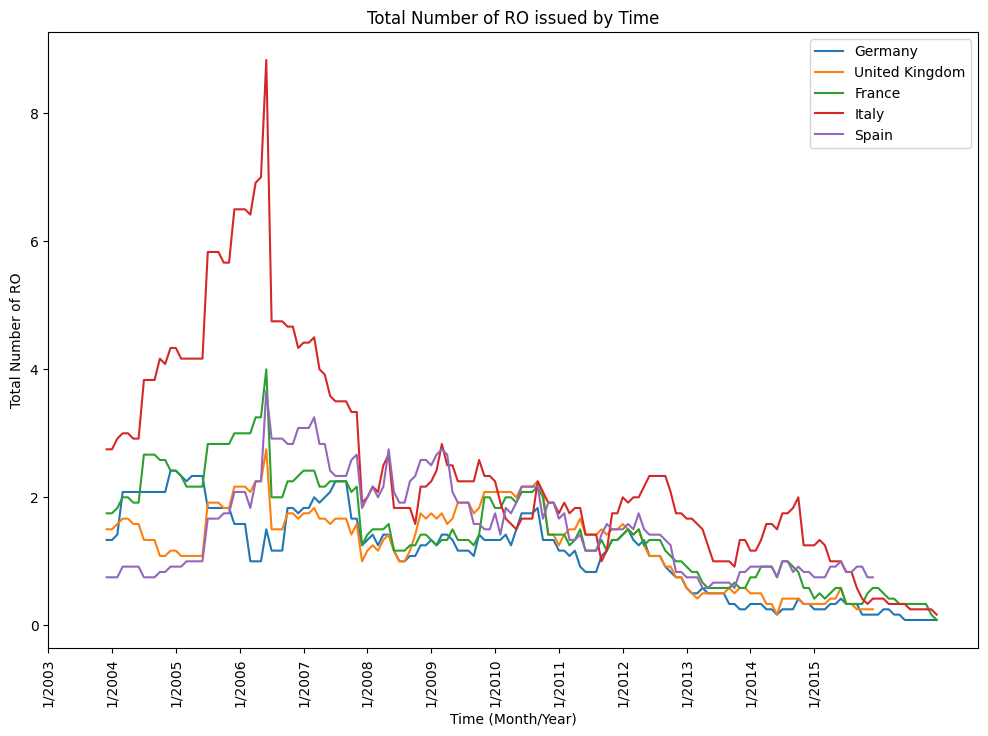

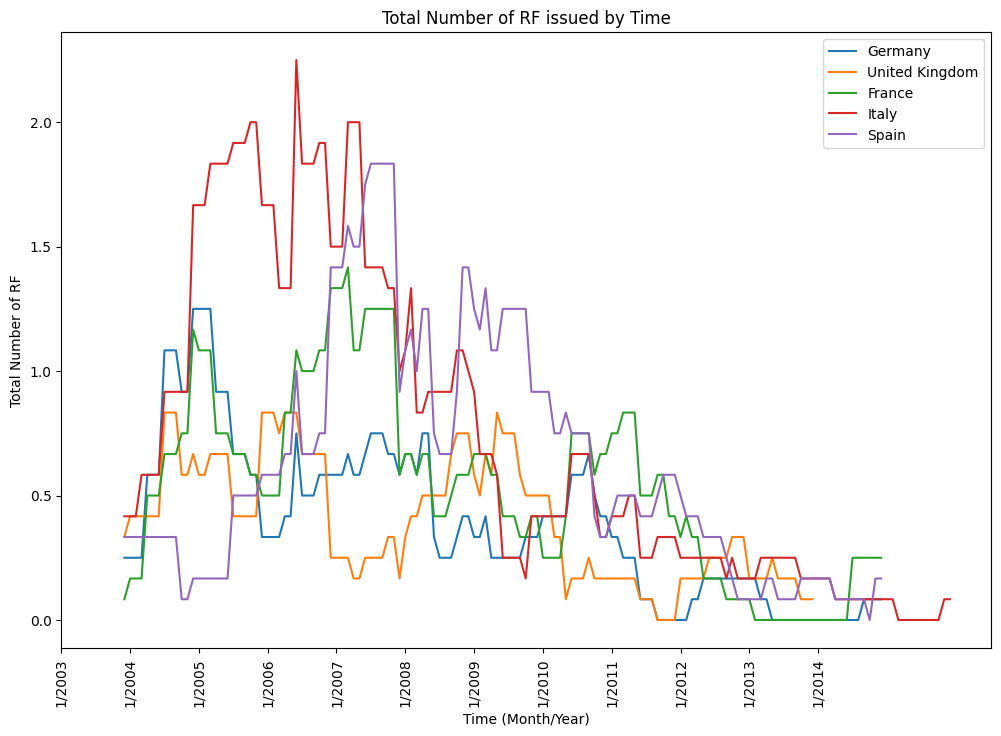

In [21]:
date_dataset = ['date_LFN_258', 'date_RO_258' , 'date_RF_258']

for date in date_dataset:
    plt.figure(figsize=(12, 8))
    for country in top_5_popl_countries:
        # Filter the data for the current country
        country_data = cheruvu_data[cheruvu_data['member_state'] == country]

        # Remove rows with NA values in the 'date_LFN_258' column
        country_data = country_data.dropna(subset=[date])

        # Convert 'date_LFN_258' to datetime objects
        date_lfn_country = country_data[date].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

        # Group the data by month and year and count the number of occurrences
        counts = date_lfn_country.groupby([date_lfn_country.dt.year, date_lfn_country.dt.month]).count()

        # assign a value of 0 for missing months
        all_months = pd.MultiIndex.from_product([range(counts.index.get_level_values(0).min(), counts.index.get_level_values(0).max() + 1),
                                                range(1, 13)],
                                                names=['Year', 'Month'])
        counts = counts.reindex(all_months, fill_value=0)

        # Rolling average with a window size of 12 months
        counts = counts.rolling(window=12).mean()
        
        counts.index = counts.index.map(lambda x: f'{x[1]}/{x[0]}')

        plt.plot(counts.index, counts.values, label=country)
        plt.xticks(rotation=90)

    plt.xlabel('Time (Month/Year)')
    plt.ylabel('Total Number of ' + date.split('_')[1])
    plt.title('Total Number of ' + date.split('_')[1] + ' issued by Time')
    plt.legend()
    plt.xticks(range(0, len(counts.index), 12), counts.index[::12], rotation=90)
    #plt.savefig('plot.png')
    # Display the plot
    plt.show()

#### Left-Right (out_left_cont) Ideology Trends Over Time

- The data set contains a continuous variable called **out_left_cont** that indicates the difference in right ideology between the ruling and the largest opposition party. Larger values indicate the ruling party is more left-wing compared to the opposition.

- Plot graphs to observe the change of the variable over time for each country. 

##### Inclusion Criteria

- Again, to avoid a cluttered and visually confusing representation with all countries, I filter data including only the top 5 populated countries. 

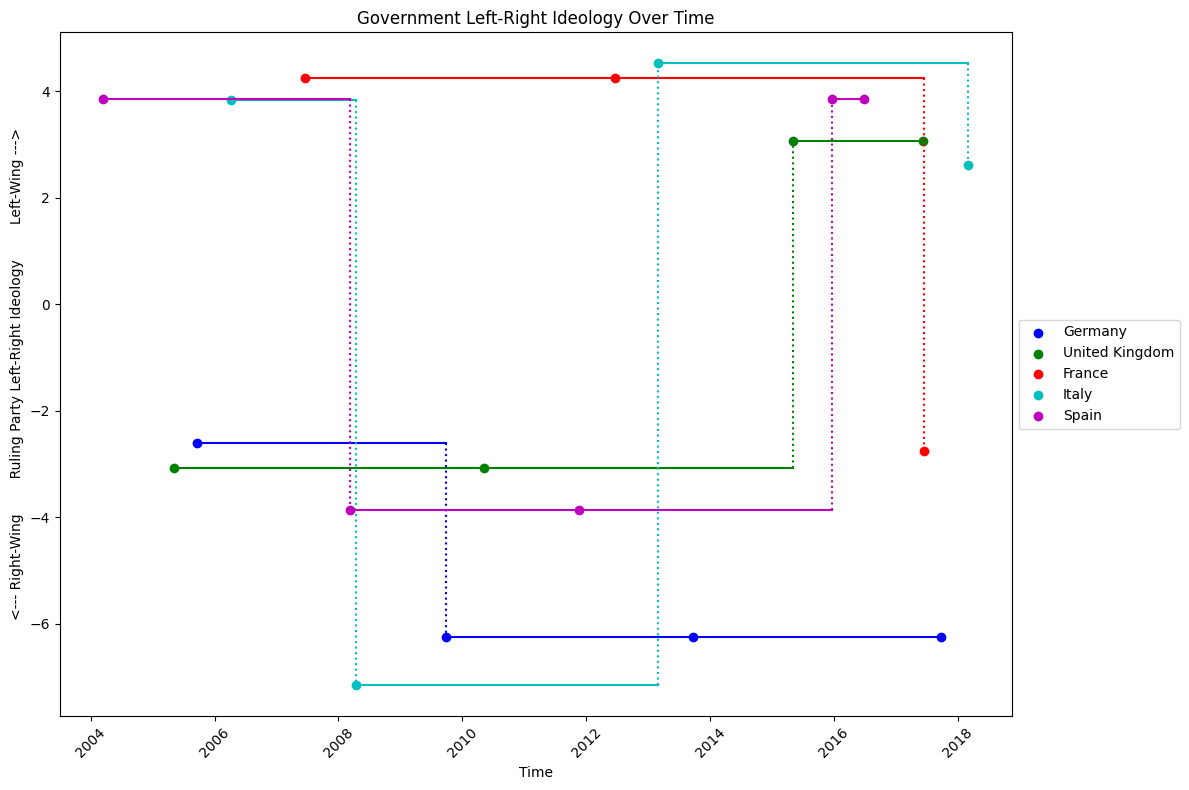

In [22]:
# Define a custom list of colors for each country
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(12, 8))

cheruvu_data['election_date'] = pd.to_datetime(cheruvu_data['election_date'])

for country, color in zip(top_5_popl_countries, colors):
    # Filter the data for the country
    country_data = cheruvu_data[cheruvu_data['member_state'] == country]

    # Sort the data by election date
    country_data = country_data.sort_values('election_date')

    # Remove rows with duplicate election dates
    country_data = country_data.drop_duplicates(subset='election_date')

    plt.scatter(country_data['election_date'], country_data['out_left_cont'], label=country, marker='o', linewidths=1, color=color)
    
    # The Government remains the same until another election
    for i in range(len(country_data) - 1):
        # Draw a horizontal line till the next point
        plt.plot([country_data.iloc[i]['election_date'], country_data.iloc[i + 1]['election_date']],
                 [country_data.iloc[i]['out_left_cont'], country_data.iloc[i]['out_left_cont']], color=color)
        
        # dotted line to signify the sudden jump to the next point
        plt.plot([country_data.iloc[i + 1]['election_date'], country_data.iloc[i + 1]['election_date']],
                 [country_data.iloc[i]['out_left_cont'], country_data.iloc[i + 1]['out_left_cont']],
                 color=color, linestyle='dotted')

plt.xlabel('Time')
plt.ylabel('<--- Right-Wing\u2002\u2002\u2002\u2002\u2002Ruling Party Left-Right Ideology\u2002\u2002\u2002\u2002\u2002Left-Wing --->')
plt.title('Government Left-Right Ideology Over Time')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


#### Pro-EU (out_eu_cont) Ideology Trends Over Time

- The data set contains a continuous variable called **out_eu_cont** that indicates the difference in Pro-EU ideology between the ruling and the largest opposition party. Larger values indicate the opposition party is more pro-EU.

- Plot graphs to observe the change of the variable over time for each country. 

##### Inclusion Criteria

- Again, to avoid a cluttered and visually confusing representation with all countries, I filter data including only the top 5 populated countries. 

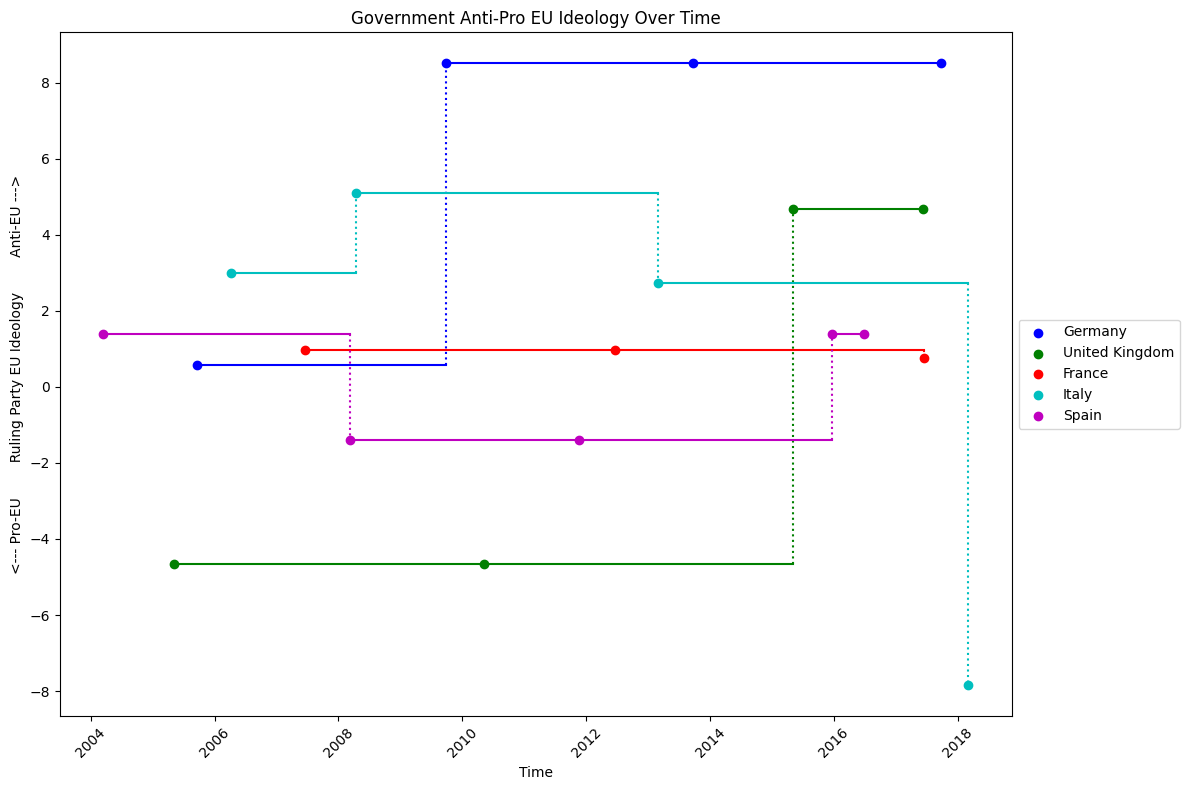

In [23]:
# Define a custom list of colors for each country
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(12, 8))

cheruvu_data['election_date'] = pd.to_datetime(cheruvu_data['election_date'])

for country, color in zip(top_5_popl_countries, colors):
    # Filter the data for the country
    country_data = cheruvu_data[cheruvu_data['member_state'] == country]

    # Sort the data by election date
    country_data = country_data.sort_values('election_date')

    # Remove rows with duplicate election dates
    country_data = country_data.drop_duplicates(subset='election_date')

    plt.scatter(country_data['election_date'], country_data['out_eu_cont'], label=country, marker='o', linewidths=1, color=color)
    
    # The Parliament Ideology remains the same until another election
    for i in range(len(country_data) - 1):
        # Draw a horizontal line till the next point
        plt.plot([country_data.iloc[i]['election_date'], country_data.iloc[i + 1]['election_date']],
                 [country_data.iloc[i]['out_eu_cont'], country_data.iloc[i]['out_eu_cont']], color=color)
        
        # dotted line to signify the sudden jump to the next point
        plt.plot([country_data.iloc[i + 1]['election_date'], country_data.iloc[i + 1]['election_date']],
                 [country_data.iloc[i]['out_eu_cont'], country_data.iloc[i + 1]['out_eu_cont']],
                 color=color, linestyle='dotted')

plt.xlabel('Time')
plt.ylabel('<--- Pro-EU\u2002\u2002\u2002\u2002\u2002Ruling Party EU Ideology\u2002\u2002\u2002\u2002\u2002Anti-EU --->')
plt.title('Government Anti-Pro EU Ideology Over Time')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


#### Workload Variable

- The data set contains a continuous variable called **worload**, which indicates the number of open infringement proceedings the Commission has against the member state at the time it issues an LFN. 
- Cheruvu's paper interprets that as the worload increases and the Commission hits more resource constraints, the Commission will have higher costs for moving a proceeding from the LFN stage to the RO stage. 
- Unfortunately, it is difficult to prove/map this because the worload variable is calculated at the time of the LFN issue date and not the RO date. However, if we do map it, there are more ROs when the worload was less than zero (less no. of open proceedings) compared to positive worloads, as you can see from the figure below.

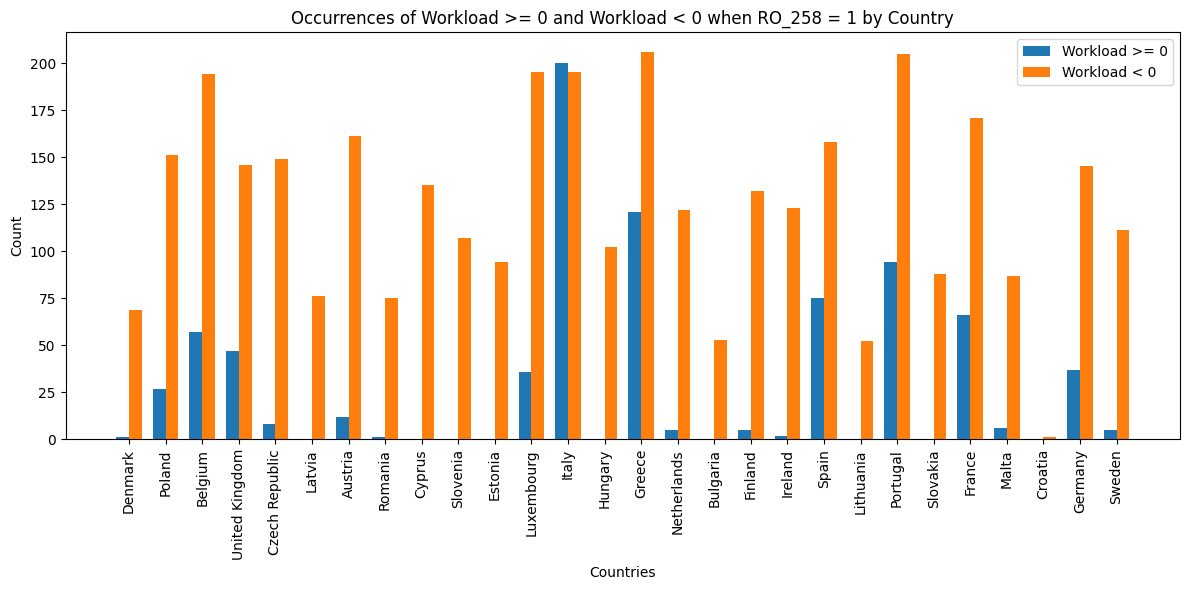

In [24]:
# Filter the data where RO_258 is equal to 1 and worload >= 0
ro258_workload_greater_zero = cheruvu_data[(cheruvu_data['RO_258'] == 1) & (cheruvu_data['workload'] >= 0)]

# Filter the data where RO_258 is equal to 1 and worload < 0
ro258_workload_less_zero = cheruvu_data[(cheruvu_data['RO_258'] == 1) & (cheruvu_data['workload'] < 0)]

# Calculate the count for workload > 0 and workload < 0 for each country
ro258_greater_zero_count = ro258_workload_greater_zero.groupby('member_state')['RO_258'].count()
ro258_less_zero_count = ro258_workload_less_zero.groupby('member_state')['RO_258'].count()

# Fill missing countries with count 0
ro258_greater_zero_count = ro258_greater_zero_count.reindex(chevuru_countries, fill_value=0)
ro258_less_zero_count = ro258_less_zero_count.reindex(chevuru_countries, fill_value=0)

plt.figure(figsize=(12, 6))
bar_width = 0.35
x_positions = np.arange(len(chevuru_countries))

plt.bar(x_positions - bar_width/2, ro258_greater_zero_count, width=bar_width, label='Workload >= 0')
plt.bar(x_positions + bar_width/2, ro258_less_zero_count, width=bar_width, label='Workload < 0')

plt.xticks(x_positions, chevuru_countries, rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Occurrences of Workload >= 0 and Workload < 0 when RO_258 = 1 by Country')
plt.legend()
plt.tight_layout()
plt.show()


#### Support Variable

- The data set contains a continuous variable called **support**, which indicates the public opinion of the EU in each member state is  another aspect of a member state’s cost of compliance. In sum, as support for EU integration decreases, compliance with EU law on average should be more costly for member states. 

- As observed from the figure below, over 16 of the countries have more ROs issued for the cases when the public supported EU. Interestingly, countries UK, Finland, Austria, and Sweden had public opinions against the EU for cases advanced to RO.

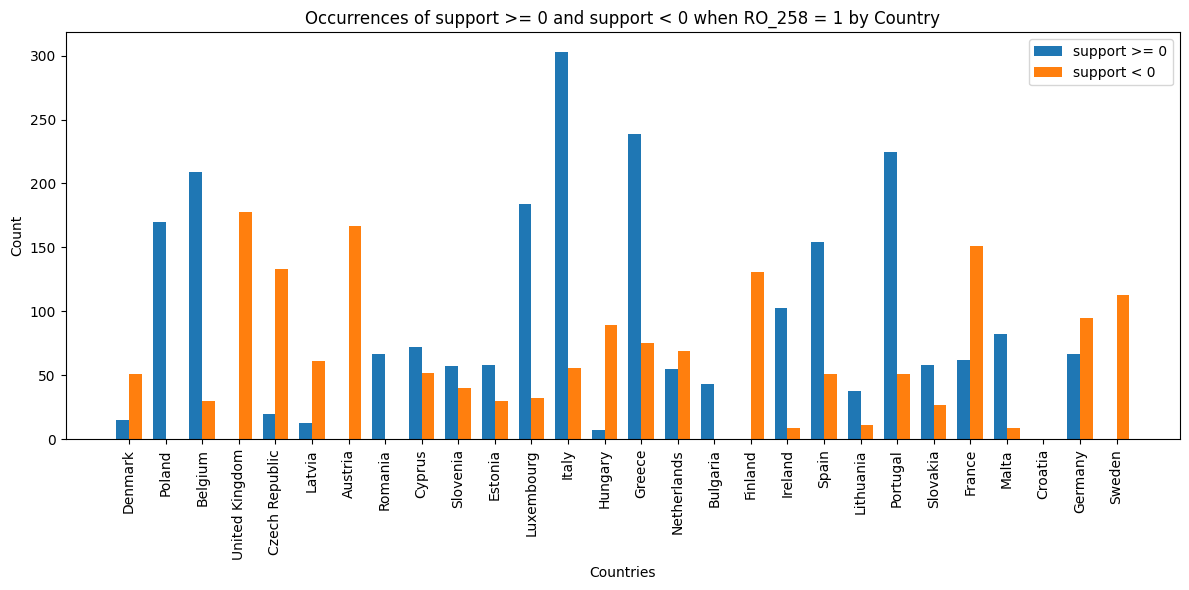

In [25]:
# Filter the data where RO_258 is equal to 1 and support >= 0
ro258_support_greater_zero = cheruvu_data[(cheruvu_data['RO_258'] == 1) & (cheruvu_data['support'] >= 0)]

# Filter the data where RO_258 is equal to 1 and support < 0
ro258_support_less_zero = cheruvu_data[(cheruvu_data['RO_258'] == 1) & (cheruvu_data['support'] < 0)]

countries = cheruvu_data['member_state'].unique()

# Calculate the count for support > 0 and support < 0 for each country
ro258_greater_zero_count = ro258_support_greater_zero.groupby('member_state')['RO_258'].count()
ro258_less_zero_count = ro258_support_less_zero.groupby('member_state')['RO_258'].count()

# Fill missing countries with count 0
ro258_greater_zero_count = ro258_greater_zero_count.reindex(chevuru_countries, fill_value=0)
ro258_less_zero_count = ro258_less_zero_count.reindex(chevuru_countries, fill_value=0)

plt.figure(figsize=(12, 6))
bar_width = 0.35
x_positions = np.arange(len(countries))

plt.bar(x_positions - bar_width/2, ro258_greater_zero_count, width=bar_width, label='support >= 0')
plt.bar(x_positions + bar_width/2, ro258_less_zero_count, width=bar_width, label='support < 0')

plt.xticks(x_positions, chevuru_countries, rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Occurrences of support >= 0 and support < 0 when RO_258 = 1 by Country')
plt.legend()
plt.tight_layout()
plt.show()



#### Action Dissent (number of open infringements) vs Desire to Dissent (Government's ideology)

Created a Action Dissent vs Desire to Dissent graph (like Figure 1 in the manuscript) using data from **Cheruvu**, where the desire to dissent would be reflected by the government's ideology and action could possibly measured by workload. This is for cases specifically for cases where the LFN issue date and the election date overlapped (about 20% of the data). For now, I am only displaying results for Italy (country with highest number of LFNs).

##### Results:
It seems that this approach is not correct. There are multiple values of workload for a unique value of out_eu_cont. Next, looking for alternatives for the Action variable (likely ROs).

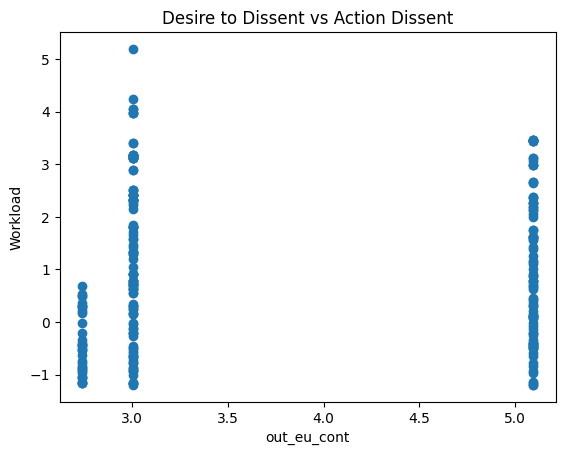

In [26]:
# Filter the data where LFN_election is equal to 1
italy_data = cheruvu_data[(cheruvu_data['member_state'] == 'Italy') & (cheruvu_data['LFN_election'] == 1)]

# Extract the desired columns
workload = italy_data['workload']
out_eu_cont = italy_data['out_eu_cont']

# Plot the graph
plt.scatter(out_eu_cont, workload)
plt.xlabel('out_eu_cont')
plt.ylabel('Workload')
plt.title('Desire to Dissent vs Action Dissent')
plt.show()


## Validating the Model

### Desire to Dissent vs Action

Created a Desire to Dissent vs Action Dissent graph (like Figure 1 in the manuscript) using data from **Official EU Website**, where the action dissent would be reflected by the total LFNs (weighted by nonconformity or non-communication proceeding) per election cycle and desire would be measured by the Parliament Ideology derived from **ParlGov** data.

#### Variables for Desire to Dissent:
- *sum_weighted_eu_anti_pro* : Variable indicating the Parliament Pro-EU Ideology

#### Variables for Action Dissent:
- *Non-communication cases* : A string with two possible values "Yes" or "No", where "Yes" indicates a non-communication proceeding while "No" indicates a non-conformity proceeding
- *Decision Type* : Variable indicating which decision was made by the EU. Filtered currently to show all LFNs issued by the Commission (to determine the total no. of LFNs)
- Let $f_{i,t}$ represent Non-Conformity proceedings in year *t* and $m_{i,t}$ represent Non-Communication proceedings
Normalizing by the maximum number of LFNs any country received in any election cycle
- Given that Non-Conformity proceedings have 40% of its cases reaching the RO stage vs Non-Communication’s 23%, a potential value of the weight could be:
w = 2

$$
\text{Action }(a_{i,t}) = \frac{w \cdot f_{i,t} + m_{i,t}}{ max_{j,t} (f_{i,t} + m_{i,t})}
$$

In [ ]:
# Combining Official EU Website Non-Conformity &Non-Communication variables with ParlGov data

# Convert the 'Decision' and 'election_date' columns to datetime
lfn_data['Decision'] = pd.to_datetime(lfn_data['Decision'])
weighted_parlgov_data['election_date'] = pd.to_datetime(weighted_parlgov_data['election_date'])

countries = weighted_parlgov_data['country_name'].unique()

# Initialize new columns in weighted_parlgov_data
weighted_parlgov_data['Non-Communication'] = 0
weighted_parlgov_data['Non-Conformity'] = 0

# Loop over each country
for country in countries:
    # Filter the ParlGov data for the current country and sort by 'election_date'
    weighted_parlgov_data_country = weighted_parlgov_data[weighted_parlgov_data['country_name'] == country].sort_values('election_date')

    # Get the date ranges from the sorted 'election_date' column
    date_ranges = list(zip(weighted_parlgov_data_country['election_date'][:-1], weighted_parlgov_data_country['election_date'][1:]))

    # Loop over the date ranges and add the counts to the new columns in weighted_parlgov_data
    for start_date, end_date in date_ranges:
        filtered_df = lfn_data[(lfn_data['Country'] == country) & (lfn_data['Decision'] >= start_date) & (lfn_data['Decision'] <= end_date)]
        counts = filtered_df['Non-communication cases'].value_counts()
        weighted_parlgov_data.loc[(weighted_parlgov_data['country_name'] == country) & (weighted_parlgov_data['election_date'] == start_date), 'Non-Communication'] = counts.get('Yes', 0)
        weighted_parlgov_data.loc[(weighted_parlgov_data['country_name'] == country) & (weighted_parlgov_data['election_date'] == start_date), 'Non-Conformity'] = counts.get('No', 0)

# Save the updated weighted_parlgov_data to a new CSV file
weighted_parlgov_data.to_csv('./EU_Data/Weighted_ParlGov_updated.csv', index=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


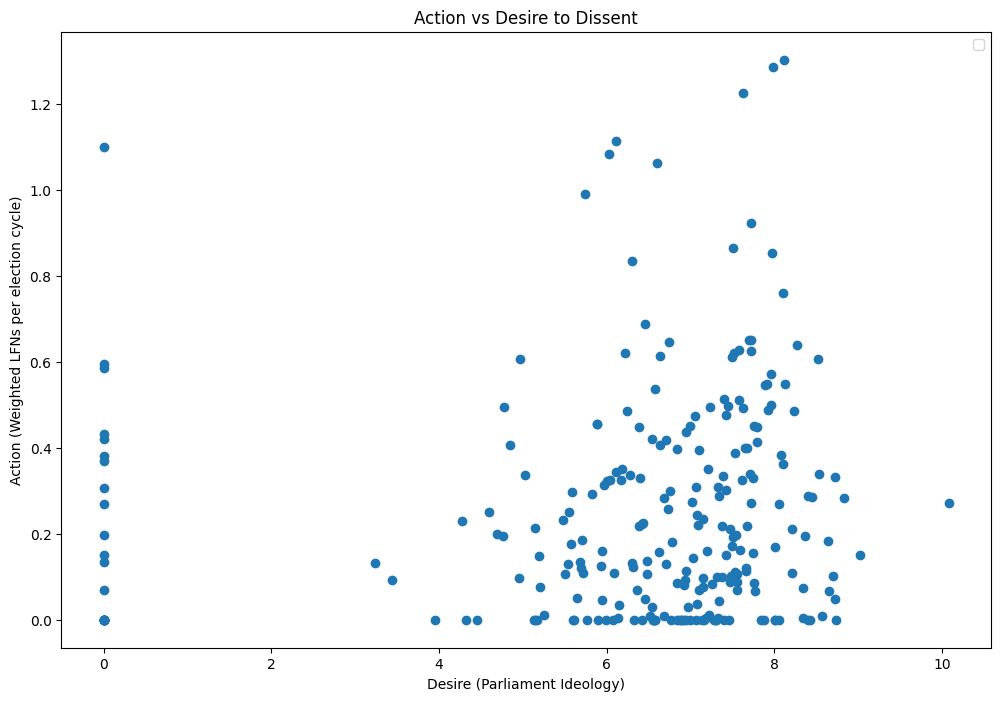

In [43]:
# Read the data from the CSV file
data = pd.read_csv('./EU_Data/Weighted_ParlGov_updated.csv')

# Calculate the action (a_i,t) based on the formula
w = 2
max_cases = data['Non-Conformity'] + data['Non-Communication']
action = (w * data['Non-Conformity'] + data['Non-Communication']) / max_cases.max()

plt.figure(figsize=(12, 8))

plt.scatter(data['sum_weighted_eu_anti_pro'], action)

plt.ylabel('Action (Weighted LFNs per election cycle)')
plt.xlabel('Desire (Parliament Ideology)')
plt.title('Action vs Desire to Dissent')
plt.legend()
plt.show()


### Action vs Punishment

Created a Action vs Punishment graph (like Figure 1 in the manuscript) using data from **Official EU Website**, where the action dissent would be reflected by the total LFNs (weighted by nonconformity or non-communication proceeding) per election cycle and punishment would be measured by total number of (weighted) ROs and RFs per election cycle. 

#### Variables for Punishment:
- *Decision Type* : Variable indicating which decision was made by the EU. Filtered currently to show all ROs and RFs issued by the Commission.
- Let $ro_{i,t}$ represent Reasoned Opinions issued and $rf_{i,t}$ represent Referral to Courts issued in election cycle *t* 

$$
\text{Punishment }(p_{i,t}) = \frac{w \cdot rf_{i,t} + ro_{i,t}}{ max_{j,t} (ro_{i,t} + rf_{i,t})}
$$

#### Variables for Action Dissent:
- *Non-communication cases* : A string with two possible values "Yes" or "No", where "Yes" indicates a non-communication proceeding while "No" indicates a non-conformity proceeding
- *Decision Type* : Variable indicating which decision was made by the EU. Filtered currently to show all LFNs issued by the Commission (to determine the total no. of LFNs)
- Let $f_{i,t}$ represent Non-Conformity proceedings in election cycle *t* and $m_{i,t}$ represent Non-Communication proceedings.
Normalizing by the maximum number of LFNs any country received in any election cycle
- Given that Non-Conformity proceedings have 40% of its cases reaching the RO stage vs Non-Communication’s 23%, a potential value of the weight could be:
w = 2

$$
\text{Action }(a_{i,t}) = \frac{w \cdot f_{i,t} + m_{i,t}}{ max_{j,t} (f_{i,t} + m_{i,t})}
$$

In [35]:
# Combining Official EU Website Non-Conformity &Non-Communication variables with ParlGov data

# Convert the 'Decision' and 'election_date' columns to datetime
ro_data['Decision'] = pd.to_datetime(ro_data['Decision'])
rf_data['Decision'] = pd.to_datetime(rf_data['Decision'])

weighted_updated_parlgov_data = pd.read_csv('./EU_Data/Weighted_ParlGov_updated.csv')

weighted_updated_parlgov_data['election_date'] = pd.to_datetime(weighted_updated_parlgov_data['election_date'])

# Get the list of unique countries
countries = weighted_updated_parlgov_data['country_name'].unique()

# Initialize new columns in weighted_updated_parlgov_data
weighted_updated_parlgov_data['RO'] = 0
weighted_updated_parlgov_data['RF'] = 0

# Loop over each country
for country in countries:
    # Filter the ParlGov data for the current country and sort by 'election_date'
    weighted_parlgov_data_country = weighted_updated_parlgov_data[weighted_updated_parlgov_data['country_name'] == country].sort_values('election_date')

    # Get the date ranges from the sorted 'election_date' column
    date_ranges = list(zip(weighted_parlgov_data_country['election_date'][:-1], weighted_parlgov_data_country['election_date'][1:]))

    # Loop over the date ranges and add the counts to the new columns in weighted_updated_parlgov_data
    for start_date, end_date in date_ranges:
        ro_filtered_df = ro_data[(ro_data['Country'] == country) & (ro_data['Decision'] >= start_date) & (ro_data['Decision'] <= end_date)]
        rf_filtered_df = rf_data[(rf_data['Country'] == country) & (rf_data['Decision'] >= start_date) & (rf_data['Decision'] <= end_date)]
        weighted_updated_parlgov_data.loc[(weighted_updated_parlgov_data['country_name'] == country) & (weighted_updated_parlgov_data['election_date'] == start_date), 'RO'] = len(ro_filtered_df)
        weighted_updated_parlgov_data.loc[(weighted_updated_parlgov_data['country_name'] == country) & (weighted_updated_parlgov_data['election_date'] == start_date), 'RF'] = len(rf_filtered_df)

# Save the updated weighted_parlgov_data to a new CSV file
weighted_updated_parlgov_data.to_csv('./EU_Data/Weighted_ParlGov_Updated.csv', index=False)


/tmp/ipykernel_28964/453680809.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  date_ranges = list(zip(weighted_parlgov_data_country['election_date'][:-1], weighted_parlgov_data_country['election_date'][1:]))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


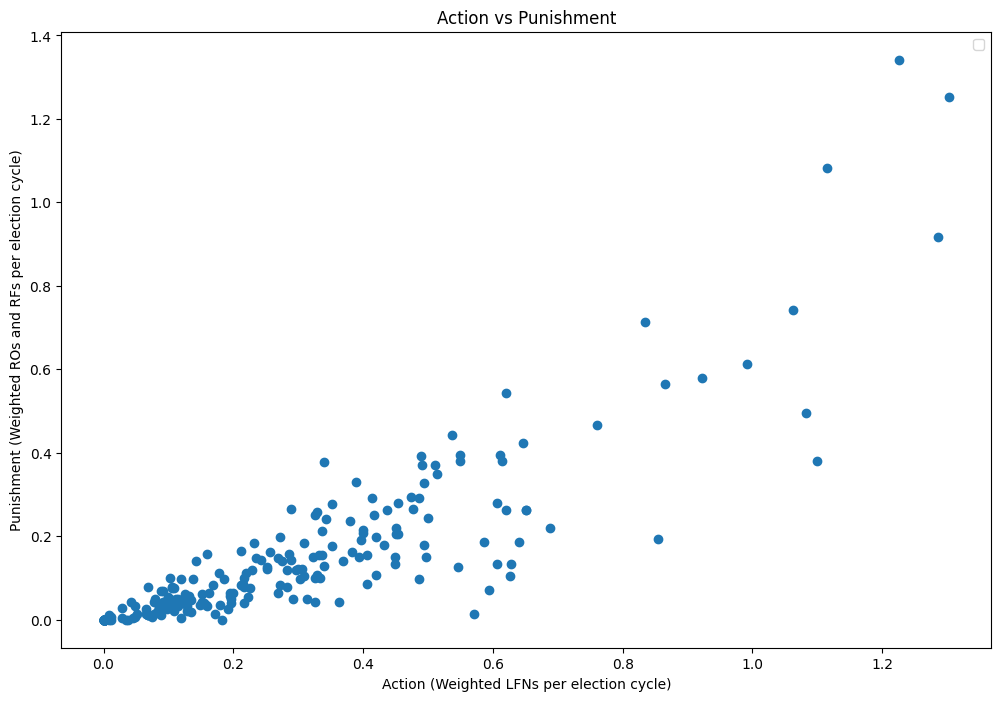

In [41]:
# Read the data from the CSV file
data = pd.read_csv('./EU_Data/Weighted_ParlGov_Updated.csv')

# Calculate the action (a_i,t) based on the formula
w = 2
max_cases = data['Non-Conformity'] + data['Non-Communication']
action = (w * data['Non-Conformity'] + data['Non-Communication']) / max_cases.max()

ro_rf_sum = data['RO'] + data['RF']
punishment = (2 * data['RF'] + data['RO']) / ro_rf_sum.max()

plt.figure(figsize=(12, 8))

plt.scatter(action[data.index], punishment[data.index])

plt.ylabel('Punishment (Weighted ROs and RFs per election cycle)')
plt.xlabel('Action (Weighted LFNs per election cycle)')
plt.title('Action vs Punishment')
plt.legend()
plt.show()
